<a href="https://colab.research.google.com/github/R-D2004/ML/blob/main/ANN_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/ANN_Bank_Marketing (1).csv")

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(Xtrain, Ytrain,epochs=50,batch_size=16)

Epoch 1/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8160 - loss: 0.3902
Epoch 2/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8953 - loss: 0.2438
Epoch 3/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8984 - loss: 0.2393
Epoch 4/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8974 - loss: 0.2347
Epoch 5/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8996 - loss: 0.2340
Epoch 6/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8999 - loss: 0.2300
Epoch 7/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 0.2222
Epoch 8/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9015 - loss: 0.2299
Epoch 9/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9028 - loss: 0.2274
Epoch 10/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9043 - loss: 0.2236
Epoch 11/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9013 - loss: 0.2291
Epoch 12/50
2261/2261 ━━━━━

In [ ]:
print(model.evaluate(Xtest,Ytest))

283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9027 - loss: 0.2314
[0.22799532115459442, 0.9013601541519165]


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9013601680858122
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7993
           1       0.62      0.39      0.48      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



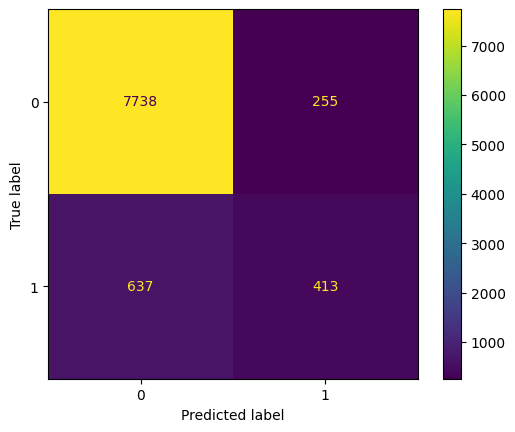

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

Ypred = model.predict(Xtest)
Ypred = [1 if p>0.5 else 0 for p in Ypred]

ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)
print("Accuracy:",accuracy_score(Ytest,Ypred))
print(classification_report(Ytest,Ypred))
